In [1]:
import sys, os
modules_path = os.path.abspath('../modules')
if modules_path not in sys.path:
    sys.path.append(modules_path)
    
from equilibrium import Equilibrium
from elements import Element
from sweep import ConcentrationSweep

import numpy as np
import matplotlib.pyplot as plt
from time import time

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# pnt parameters (energies in kcal/mole)
eq = Equilibrium()
dG_specific = eq.get_dG(25e-12) # 25 pM KD for ETS-1 and specific sites
dG_nonspecific = eq.get_dG(10e-6) # 10 uM KD for ETS-1 and non-specific sites (no overlap, <10um for overlap)

# yan parameters (energies in kcal/mole)
a0, b0, c0 = -9.955, -5.837, -7.043
alpha = [dG_specific, a0] 
beta = [dG_nonspecific, b0] 
gamma = [.8*c0, c0] 

params = dict(alpha=alpha, beta=beta, gamma=gamma)

In [8]:
Ns = 5
Nc = (10, 10)
# 12 sites, 25x25 concs, 0 to 10 took 8.4 seconds

In [9]:
#%%prun -D ../profiling/light.prof
start = time()
element = Element(Ns=Ns, params=params, ets=(0,))
sweep = ConcentrationSweep(cmin=(0, 0), cmax=(10, 10), Nc=Nc)
boccupancies = sweep.get_occupancies(element, cut_depth=1)
print(time()-start)

0.0948801040649414


In [10]:
#%%prun -D ../profiling/light.prof
start = time()
element = Element(Ns=Ns, params=params, ets=(0,))
sweep = ConcentrationSweep(cmin=(0, 0), cmax=(10, 10), Nc=Nc)
occupancies = sweep.get_occupancies(element, cut_depth=2)
print(time()-start)

0.08635711669921875


In [11]:
np.allclose(boccupancies.occupancies, occupancies.occupancies)

False

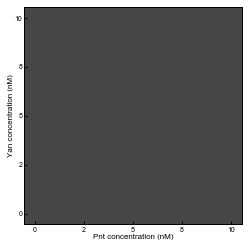

In [12]:
fig = occupancies.plot_overall_occupancy(species='Pnt', cmap=plt.cm.PiYG, mask=True)

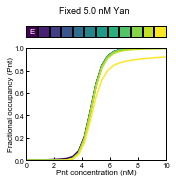

In [14]:
fig = occupancies.plot_contours(species='Pnt', variable='Pnt', fixed=12, figsize=(2.5, 2.5))

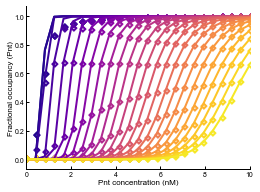

In [15]:
_ = occupancies.show_model()

In [16]:
old = np.load('old_occ.npy')
np.allclose(occupancies.occupancies, old)

True

In [2]:
subprocess.

NameError: name 'subprocess' is not defined

In [11]:
cel = el.get_c_element()

In [5]:
import pickle

In [16]:
pickle.Pickler(cel)

TypeError: file must have a 'write' attribute

In [17]:
pickle.dump(cel, open('test_pickle.txt', 'wb'))

In [18]:
cel_recovered = pickle.load( open( "test_pickle.txt", "rb" ) )

In [19]:
cel_recovered

In [20]:
cel

In [ ]:
@staticmethod
    def from_python(element, concentrations, cut_depth=None):

In [9]:
from partitions import PartitionFunction, cPF

In [11]:
pf = cPF.from_python(element, sweep.concentrations, cut_depth=0)

TypeError: self.Z,self.degeneracy,self.leaf_degeneracy,self.leaf_deltaG,self.leaf_parent_branch,self.leaf_weights,self.occupancies,self.root_weights,self.weights cannot be converted to a Python object for pickling

In [4]:
from array import array
from trees import cTree
import pickle

In [5]:
Ns = 5
Nc = (25, 25)
sweep = ConcentrationSweep(cmin=(0, 0), cmax=(10, 10), Nc=Nc)
element = Element(Ns, params=params)

In [6]:
C = array('d', sweep.concentrations.flatten())
tree = cTree(element.get_c_element(), np.product(sweep.Nc), C, 0)

In [8]:
pickle.dump(tree, open('tree_pickle.txt', 'wb'))

In [9]:
tree_recovered = pickle.load( open( "tree_pickle.txt", "rb" ) )